**REFERENCE:**
+ [【图像压缩】SVD-矩阵奇异值分解](https://mp.weixin.qq.com/s/upc8yNRhs4SJtDHYzGEQIg)

In [1]:
#%% 奇异值分解

import numpy as np

A = [[1, 0, 0, 0],
     [0, 0, 0, 4],
     [0, 3, 0, 0],
     [0, 0, 0, 0],
     [2, 0, 0, 0]]

U, s, V = np.linalg.svd(A)

# 由于S不是方阵，所以不能通过np.diag(s)来构造矩阵S
S = np.zeros((U.shape[1], V.shape[0]))  
for i, eigen in enumerate(s):
     S[i][i] = eigen

print("shape: U{},  S{},  V{}".format(U.shape, S.shape, V.shape))

result = U @ S @ V
result

shape: U(5, 5),  S(5, 4),  V(4, 4)


array([[1., 0., 0., 0.],
       [0., 0., 0., 4.],
       [0., 3., 0., 0.],
       [0., 0., 0., 0.],
       [2., 0., 0., 0.]])

In [2]:
#%% 验证内积和迹的关系：inner<A, B> = tr(A.T @ B)
import numpy as np

# A 和 B 是两个同型的矩阵
A = np.arange(0,12).reshape((3, 4))
B = np.arange(12,24).reshape((3, 4))

# 对A和B进行内积再累加求和
inner_product = A * B
inner_sum = inner_product.sum(axis=(0, 1))

# 计算 A.T @ B 的迹
tr = np.trace(A.T @ B)

assert inner_sum == tr  # 两个结果相等

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


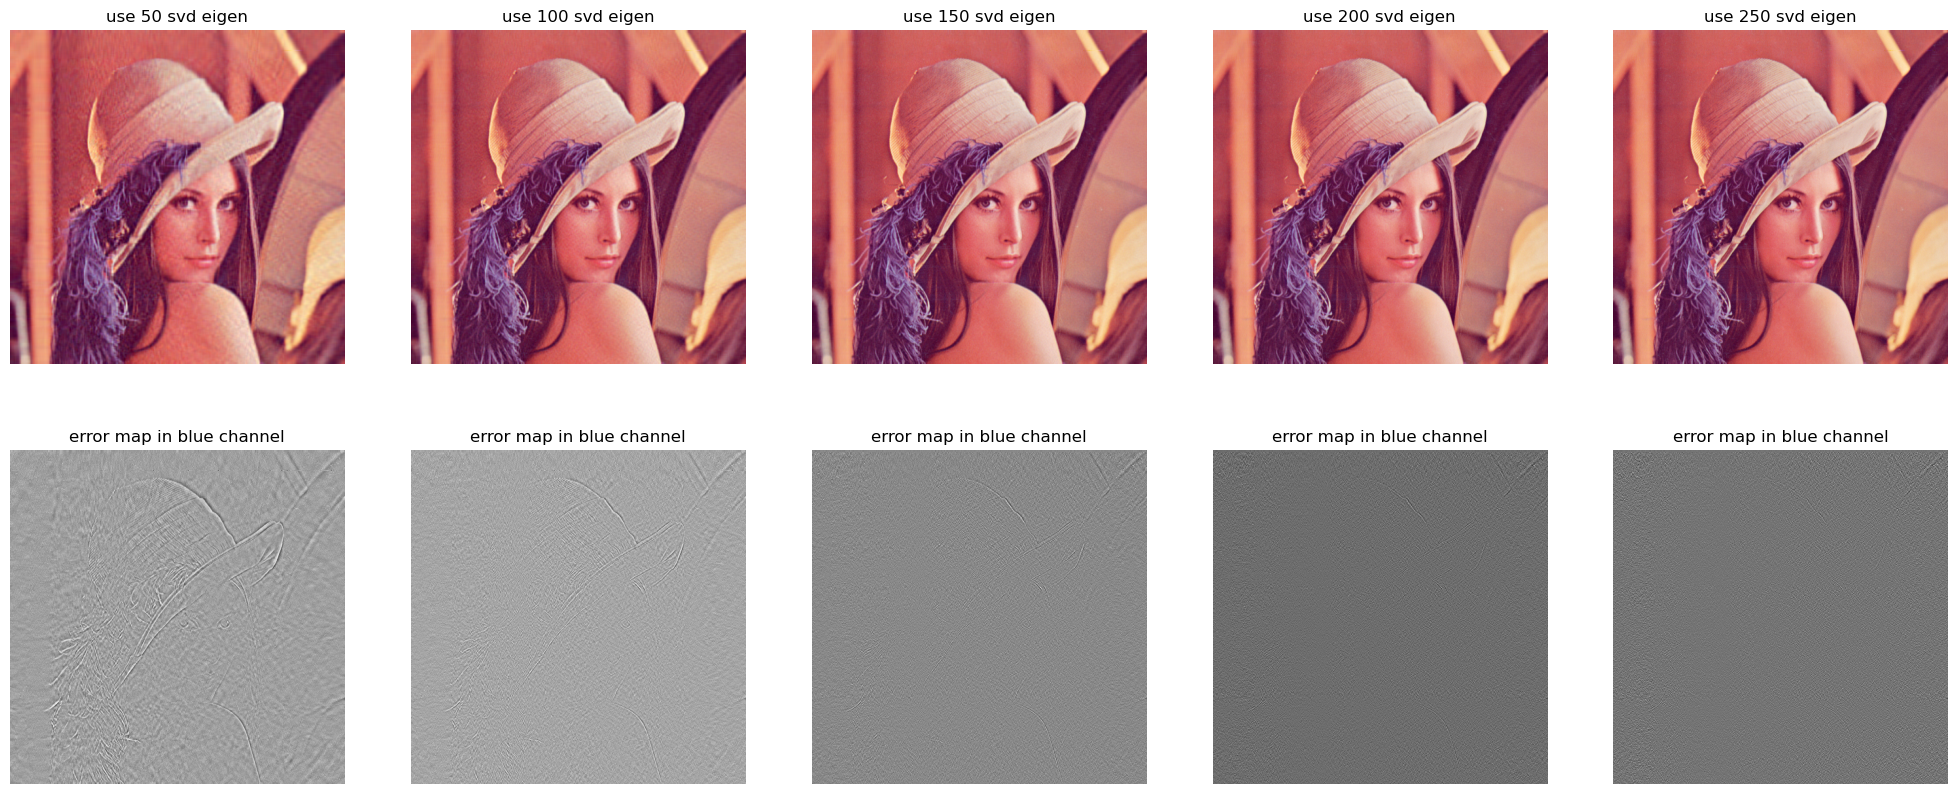

In [3]:
#%% 对图像进行SVD分解

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

img = image.imread("../data/lena.png")
row, col = 2, 5
plt.figure(figsize = (25, 10))  # 设置整个画布的大小

# 分别使用eigen_num个特征值，对SVD分解后的图像进行恢复
for img_index in np.arange(1, 6):
    # 对RGB三个不同的通道分别进行SVD分解，再分别进行恢复
    recover = []
    eigen_num = img_index * 50
    for channel in [0, 1, 2]:
        # 矩阵分解
        U, s, V = np.linalg.svd(img[:, :, channel])   # s是特征值列表
        S = np.zeros((U.shape[1], V.shape[0]))
        for i in np.arange(0, eigen_num):
            S[i, i] = s[i]
        # 恢复为原来的矩阵
        recover_result = U @ S @ V
        recover.append(recover_result)

    recover_img = np.stack(recover, axis = 2)
    recover_img[ recover_img >= 255] = 255
    recover_img[ recover_img <= 0] = 0
    recover_img = recover_img

    # 绘制恢复后的图像
    plt.subplot(row, col, img_index)
    plt.axis("off")
    plt.title("use {} svd eigen".format(eigen_num))
    plt.imshow(recover_img)

    # 绘制误差图
    plt.subplot(row, col, img_index + col)
    plt.axis("off")
    plt.title("error map in blue channel".format(eigen_num))
    plt.imshow(255 - (img[:, :, 2] - recover_img[:, :, 2]), cmap = 'Greys')

plt.subplots_adjust()
plt.show()


C:\Users\26297\AppData\Local\Temp\ipykernel_29648\816708490.py:33: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  noisy_psnr, nosiy_mse = compare_psnr(img, noisy_img), mse(img, noisy_img)
C:\Users\26297\AppData\Local\Temp\ipykernel_29648\816708490.py:34: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  recover_psnr, recover_mse = compare_psnr(img, recover_img), mse(img, recover_img)


	data       	rank  	psnr   	mse
 	original   	481    	/      	/
 	noisy_img  	512    	20.003 	0.010
 	recov_img  	20    	24.832 	0.003



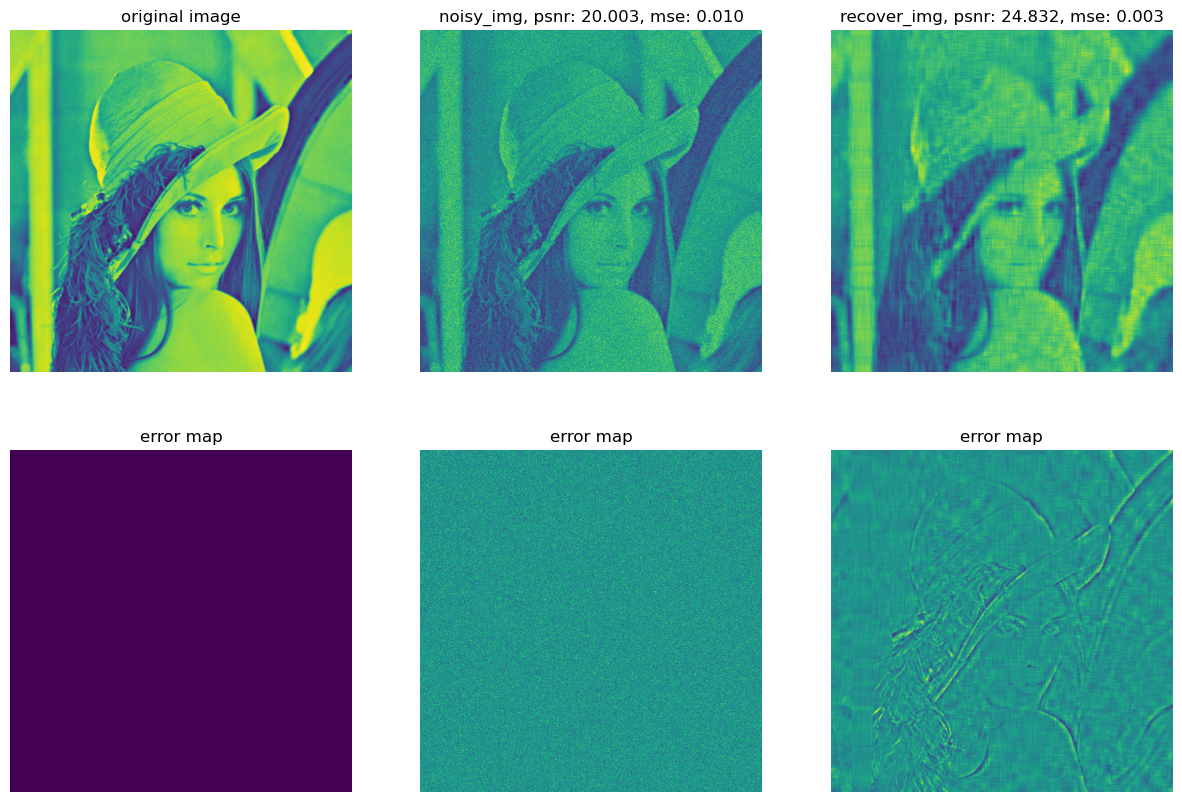

In [47]:
#%% 利用SVD减少图像噪声

# 噪声会增加图像的秩，干净图像是低秩的。
# 利用低秩，可以把图像和噪声分离了，达到去噪结果，

#%% 对图像进行SVD分解

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from skimage.metrics import peak_signal_noise_ratio as compare_psnr
from skimage.metrics import mean_squared_error as mse
from numpy.linalg import matrix_rank as rank
img = image.imread("../data/lena.png")[:, :, 0]

plt.figure(figsize = (15, 10))  # 设置整个画布的大小

noise = np.random.normal(0, 0.01, img.shape)*10
noisy_img = img + noise
noisy_img[noisy_img < 0] = 0
noisy_img[noisy_img > 255] = 255

recover = []
eigen_num = 20
# 矩阵分解
U, s, V = np.linalg.svd(noisy_img)   # s是特征值列表
S = np.zeros((U.shape[1], V.shape[0]))
for i in np.arange(0, eigen_num):
    S[i, i] = s[i]
recover_img = U @ S @ V

# 计算带噪图像、SVD处理图像和原始图像之间的psnr
noisy_psnr, nosiy_mse = compare_psnr(img, noisy_img), mse(img, noisy_img)
recover_psnr, recover_mse = compare_psnr(img, recover_img), mse(img, recover_img)
img_rank, noisy_rank, recover_rank = rank(img), rank(noisy_img), rank(recover_img)

# 输出各项指标
print(
    "\tdata       \trank  \tpsnr   \tmse\n",
    "\toriginal   \t{}    \t/      \t/\n".format(img_rank),
    "\tnoisy_img  \t{}    \t{:.3f} \t{:.3f}\n".format(noisy_rank, noisy_psnr, nosiy_mse),
    "\trecov_img  \t{}    \t{:.3f} \t{:.3f}\n".format(recover_rank, recover_psnr,recover_mse)
)

pics = [img, noisy_img, recover_img]
titles = [
    "original image",
    "noisy_img, psnr: {:.3f}, mse: {:.3f}".format(noisy_psnr, nosiy_mse),
    "recover_img, psnr: {:.3f}, mse: {:.3f}".format(recover_psnr, recover_mse)]
for index, pic in enumerate(pics):
    
    plt.subplot(2, 3, index+1)
    plt.axis("off")
    plt.title(titles[index])
    plt.imshow(pic)

    plt.subplot(2, 3, index+4)
    plt.axis("off")
    plt.title("error map")
    plt.imshow(img - pic)

plt.subplots_adjust()
plt.show()

# 当在SVD处理中取100个特征值时，对噪声图和恢复图进行衡量，结果如下
#  data           psnr        mse
#  noisy_img      19.994      0.010
#  recover_img    24.856      0.003
# 可见，通过SVD降低图像的秩，可以去掉部分噪声

# BUT！！！虽然recover_img的各项指标优于noisy_img，但从展示的效果图来看，
# 噪声图像和原始图像更加接近，甚至recover_img更像是噪声图！！！

# 所以虽然低秩是自然图像的一个特点，但只追求低秩得到的恢复图像并不一定是好的！！！


In [26]:
titles

['original image',
 'noisy_img, psnr: 19.994, mse: 0.010',
 'recover_img, psnr: 24.856, mse: 0.003']